In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.preprocessing import StandardScaler
import os
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [2]:
df1=pd.read_csv("database.csv")

In [3]:
Y = df1.iloc[:,25:28]
X = df1.iloc[:,:8]
Y.head()

,q_abs,q_sca,g
0,0.11691,0.000389,0.003798
1,0.15300,0.001005,0.008979
2,0.20060,0.002514,0.022970
3,0.23162,0.004187,0.037044
4,0.25746,0.005988,0.051049


In [44]:
train_set=df1[(df1['fractal_dimension']<2.1) | (df1['fractal_dimension']>2.2)]
test_set=df1[(df1['fractal_dimension']==2.1) | (df1['fractal_dimension']==2.2)]
test_set.shape

(2968, 36)

In [45]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [46]:
scaling_x=StandardScaler()
#scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
#Y_train=scaling_y.fit_transform(Y_train)

Hyperparameters:
1. No of hideen layers
2. No of neurons in hidden layers
3. Learning rate

In [7]:
def build_model(hp):
    model=keras.Sequential()
    
    for i in range(hp.Int('num_layers', 3,10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=256,
                                           step=32),
                              activation='relu'))
        model.add(layers.Dense(3, activation='linear'))
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_percentage_error',
        metrics=['mean_absolute_percentage_error'])
        
    return model
        
    
    

In [8]:
tuner=RandomSearch(build_model,
                  objective='mean_absolute_percentage_error',
                  max_trials=10,
                  executions_per_trial=3,
                   directory= 'project1',
                   project_name='fractal_dim_2_1_2_2'
                  )

In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}


In [10]:
tuner.search(X_train, Y_train, epochs=200)

Trial 10 Complete [00h 03m 07s]
mean_absolute_percentage_error: 16.28429921468099

Best mean_absolute_percentage_error So Far: 2.778304179509481
Total elapsed time: 00h 27m 06s
INFO:tensorflow:Oracle triggered exit


In [11]:
tuner.results_summary()

Results summary
Results in project1\fractal_dim_2_1_2_2
Showing 10 best trials
Objective(name='mean_absolute_percentage_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 192
learning_rate: 0.0001
units_1: 160
units_2: 96
units_3: 32
units_4: 192
units_5: 32
units_6: 192
units_7: 160
units_8: 160
Score: 2.778304179509481
Trial summary
Hyperparameters:
num_layers: 5
units_0: 96
learning_rate: 0.001
units_1: 64
units_2: 160
units_3: 256
units_4: 224
Score: 2.945071220397949
Trial summary
Hyperparameters:
num_layers: 8
units_0: 64
learning_rate: 0.001
units_1: 256
units_2: 64
units_3: 128
units_4: 96
units_5: 96
units_6: 192
units_7: 64
units_8: 224
Score: 9.816740989685059
Trial summary
Hyperparameters:
num_layers: 9
units_0: 96
learning_rate: 0.001
units_1: 64
units_2: 32
units_3: 64
units_4: 224
units_5: 32
units_6: 192
units_7: 96
units_8: 64
Score: 13.391101678212484
Trial summary
Hyperparameters:
num_layers: 5
units_0: 96
learning_rate: 0.01
units_1: 192


In [7]:
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(192, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model2.add(Dense(160, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(96, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(192, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(192, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(160, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(160, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model2.add(Dense(3, kernel_initializer='normal',activation='linear'))


# Compile the network :
NN_model2.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
NN_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               1728      
_________________________________________________________________
dense_1 (Dense)              (None, 160)               30880     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                15456     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3104      
_________________________________________________________________
dense_4 (Dense)              (None, 192)               6336      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                6176      
_________________________________________________________________
dense_6 (Dense)              (None, 192)               6

In [8]:
filepath="fractal_dimension_2_2_with_min_max/Weights-{epoch:03d}--{val_loss:.5f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

In [9]:
# # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

In [10]:
log_csv=CSVLogger('fractal_dimension_2_2_with_min_max_loss_logs.csv', separator=',', append=False)

In [11]:
callback_list=[checkpoint, es, log_csv]

In [12]:
history2= NN_model2.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split = 0.2, callbacks=callback_list)
#history= NN_model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split = 0.2)

Epoch 1/5
172/172 [==============================] - 3s 8ms/step - loss: 48.2254 - accuracy: 0.7915 - val_loss: 31.0402 - val_accuracy: 0.9818

Epoch 00001: val_loss improved from inf to 31.04020, saving model to fractal_dimension_2_2_with_min_max\Weights-001--31.04020.hdf5
Epoch 2/5
172/172 [==============================] - 1s 6ms/step - loss: 23.6136 - accuracy: 0.8695 - val_loss: 22.9488 - val_accuracy: 0.9818

Epoch 00002: val_loss improved from 31.04020 to 22.94881, saving model to fractal_dimension_2_2_with_min_max\Weights-002--22.94881.hdf5
Epoch 3/5
172/172 [==============================] - 1s 6ms/step - loss: 23.2048 - accuracy: 0.8695 - val_loss: 23.2641 - val_accuracy: 0.9818

Epoch 00003: val_loss did not improve from 22.94881
Epoch 4/5
172/172 [==============================] - 1s 6ms/step - loss: 21.4067 - accuracy: 0.8695 - val_loss: 19.6371 - val_accuracy: 0.9818

Epoch 00004: val_loss improved from 22.94881 to 19.63713, saving model to fractal_dimension_2_2_with_min_

In [13]:
NN_model2.save('fractal_dimension_2_2_with_min_max.h5')

Train loss: 19.697, Test loss: 28.166


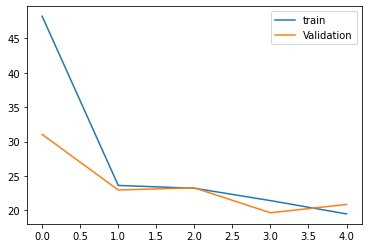

In [14]:
# evaluate the model
train_loss, train_acc = NN_model2.evaluate(X_train, Y_train, verbose=0)
test_loss, test_acc = NN_model2.evaluate(X_test, Y_test, verbose=0)
print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))
# plot training history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [15]:
weights_file = 'fractal_dimension_2_2_with_min_max/Weights-140--5.92617.hdf5' # choose the best checkpoint 
NN_model2.load_weights(weights_file) # load it
NN_model2.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [16]:
Y_pred = NN_model2.predict(X_test)
#Y_pred=scaling_y.inverse_transform(Y_pred)

In [34]:
Y_pred

array([[1.12772465e-01, 2.87264382e-04, 3.98085313e-03],
       [1.43936619e-01, 8.18360480e-04, 8.11947323e-03],
       [1.85850799e-01, 2.00543343e-03, 1.65507160e-02],
       ...,
       [8.18228960e-01, 8.01968575e-01, 7.81833053e-01],
       [8.46413493e-01, 8.37947845e-01, 7.91652024e-01],
       [8.75137448e-01, 8.72808576e-01, 8.00253093e-01]], dtype=float32)

In [35]:
new_y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca","g"])
new_y_pred

,q_abs,q_sca,g
0,0.112772,0.000287,0.003981
1,0.143937,0.000818,0.008119
2,0.185851,0.002005,0.016551
3,0.222542,0.003697,0.023324
4,0.249847,0.005696,0.029588
...,...,...,...
2963,0.758170,0.726653,0.764426
2964,0.789244,0.765660,0.772532
2965,0.818229,0.801969,0.781833
2966,0.846413,0.837948,0.791652


In [48]:
Y_test.reset_index(inplace = True, drop=True)


In [52]:
X_test

array([[ 1.29373796,  0.8503249 , -1.01093925, ..., -1.48688384,
        -1.53366351, -1.1796813 ],
       [ 1.29373796,  0.8503249 , -1.01093925, ..., -1.39604245,
        -1.41891619, -1.13727688],
       [ 1.29373796,  0.8503249 , -1.01093925, ..., -1.28158948,
        -1.27434361, -1.07689085],
       ...,
       [-1.10875777,  1.17479659,  2.1962418 , ...,  3.31383812,
         1.2776448 ,  2.96724435],
       [-1.10875777,  1.17479659,  2.1962418 , ...,  3.5200627 ,
         1.40789226,  3.23017222],
       [-1.10875777,  1.17479659,  2.1962418 , ...,  3.71152429,
         1.5288157 ,  3.47913291]])

In [50]:
diff=Y_test-Y_pred

In [51]:
diff['q_abs']

0       0.004138
1       0.009063
2       0.011519
3       0.005878
4       0.001703
          ...   
2963    0.252830
2964    0.268556
2965    0.281771
2966    0.293287
2967    0.300763
Name: q_abs, Length: 2968, dtype: float64

In [36]:
error= mean_absolute_percentage_error(Y_test, new_y_pred, multioutput='raw_values')   
print('Mean absolute percentage error on test set: ', error)

Mean absolute percentage error on test set:  [0.04380308 0.09612698 0.0558288 ]


In [37]:
error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   
print('Mean absolute percentage error on test set: ', error)

Mean absolute percentage error on test set:  [0.04380308 0.09612698 0.0558288 ]
